# Synthetic results analysis

In [42]:
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["figure.dpi"]     = 150

## Utils

In [ ]:
def chamfer(df, prefix, legend, threshold_bnds=(0, 1), color="gray"):
    import matplotlib.pyplot as plt
    
    pattern = re.compile(r"refined_chamfer_(.*)")
    thresholds = []

    for col in df.columns:
        match = pattern.match(col)
        if match:
            thresholds.append(match.group(1))
        
    cd_t = []    
    t = []
    for th in thresholds:
        if float(th) < threshold_bnds[0] or float(th) > threshold_bnds[1]: continue
        cd = df[f"{prefix}_chamfer_{th}"].mean()
        cd_t.append(cd)
        t.append(float(th))
     
     
    plt.plot(t, cd_t, label=legend, color=color)
    plt.yscale('log')
    plt.xlabel("Threshold [Prob]")
    plt.ylabel("d_chamfer [mm]")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    
    
def chamfer_adaptive(df, color="black", line="--", suffix="(diffusion)"):
    import matplotlib.pyplot as plt
    mean_val = df["refined_chamfer_adaptive"].mean()
    plt.axhline(
        y=mean_val,
        color=color,      # choose a color
        linestyle=line,     # dashed line for clarity
        linewidth=1.5,
        label=f"adaptive threshold mean ({mean_val:.2f}) [mm] {suffix}"
    )
    plt.legend(loc="right")
    plt.tight_layout()
    
    

def dice3d(df, prefix, legend, threshold_bnds=(0, 1), color="gray"):
    import matplotlib.pyplot as plt
    
    pattern = re.compile(r"refined_chamfer_(.*)")
    thresholds = []

    for col in df.columns:
        match = pattern.match(col)
        if match:
            thresholds.append(match.group(1))
        
    cd_t = []    
    t = []
    for th in thresholds:
        if float(th) < threshold_bnds[0] or float(th) > threshold_bnds[1]: continue
        cd = df[f"{prefix}_dice3d_{th}"].mean()
        cd_t.append(cd)
        t.append(float(th))
     
     
    plt.plot(t, cd_t, label=legend, color=color)
    plt.xlabel("Threshold [Prob]")
    plt.ylabel("Dice3d [Frac]")
    plt.title(f"Dice3d")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()


def dice3d_adaptive(df, color="black", line="--", suffix="(diffusion)"):
    import matplotlib.pyplot as plt
    mean_val = df["refined_dice3d_adaptive"].mean()
    plt.axhline(
        y=mean_val,
        color=color,      # choose a color
        linestyle=line,     # dashed line for clarity
        linewidth=1.5,
        label=f"adaptive threshold mean ({mean_val:.2f}) {suffix}"
    )
    plt.legend(loc="right")


def metric_difference(df, metric_name, log=False, inverted=False, color="gray", legend=""):
    pattern = re.compile(r"refined_dice3d_(.*)")
    thresholds = []

    for col in df.columns:
        match = pattern.match(col)
        if match:
            thresholds.append(match.group(1))
        
    d3d_t = []    
    t = []
    for th in thresholds:
        d3d = df[f"refined_{metric_name}_{th}"].mean()
        d3d_bp = df[f"backproj_{metric_name}_{th}"].mean()
        t.append(float(th))
        if inverted: d3d_t.append(d3d_bp - d3d)
        else: d3d_t.append(d3d - d3d_bp)

    import matplotlib.pyplot as plt

    plt.plot(t, d3d_t, color=color, label=legend)
    plt.ylabel("difference [Frac]")
    plt.xlabel("threshold [Prob]")
    if log: plt.yscale("log")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    
def metric_difference_adaptive(df, metric_name, color="black", line="--", suffix="(diffusion)"):
    import matplotlib.pyplot as plt
    mean_val = (df[f"refined_{metric_name}_adaptive"] - df[f"backproj_{metric_name}_adaptive"]).mean()
    plt.axhline(
        y=mean_val,
        color=color,      # choose a color
        linestyle=line,     # dashed line for clarity
        linewidth=1.5,
        label=f"adaptive threshold mean ({mean_val:.2f}) {suffix}"
    )
    plt.legend(loc="lower right")


def latex_make_table(h, v_ours, v_gan, caption="", label=""):
    table = r"\begin{table}\begin{center}\begin{tabular}{lc}" + "\n"
    table += r"\hline" + "\n"
    table += f"Model & {h} \\\\\n"
    table += r"\hline" + "\n"
    table += f"Ours & {v_ours:.2f} \\\\\n"
    table += f"Baseline (gan) & {v_gan:.2f} \\\\\n"
    table += r"\hline" + "\n"
    table += r"\end{tabular}\end{center}" + "\n"
    table += r"\caption{" + caption + r" \label{" + label + r"}}" + "\n"
    table += r"\end{table}" + "\n"
    return table


## Right

In [44]:
df = pd.read_csv("../data/synthetic_right.csv")
df_baseline = pd.read_csv("../data/synthetic_baseline_right.csv")
df_adaptive = pd.read_csv("../data/synthetic_adaptive_right.csv")
df_adaptive_baseline = pd.read_csv("../data/synthetic_adaptive_baseline_right.csv")

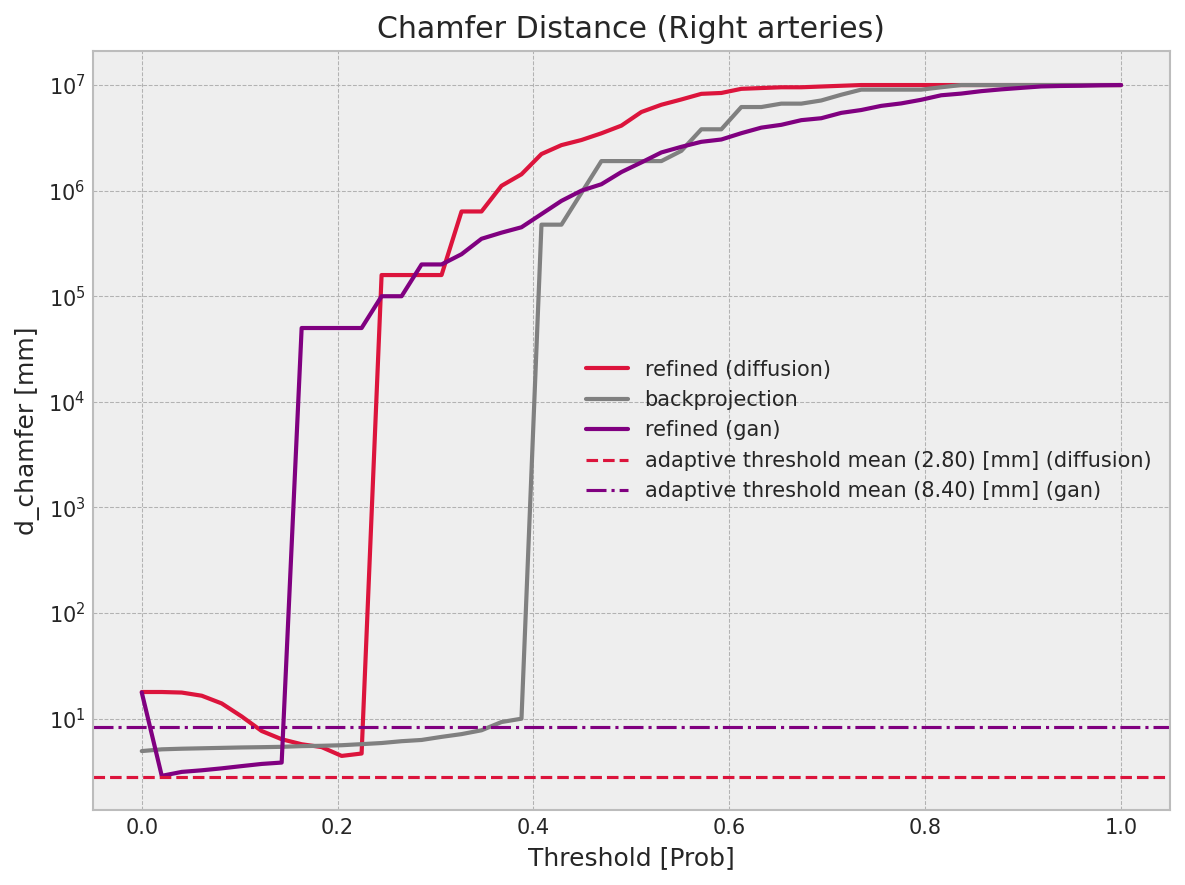

In [45]:
plt.title(f"Chamfer Distance (Right arteries)")
chamfer(df, prefix="refined", legend="refined (diffusion)", color="crimson")
chamfer(df, prefix="backproj", legend="backprojection", color="gray")
chamfer(df_baseline, prefix="refined", legend="refined (gan)", color="purple")
chamfer_adaptive(df_adaptive, color="crimson")
chamfer_adaptive(df_adaptive_baseline, color="purple", line="-.", suffix="(gan)")


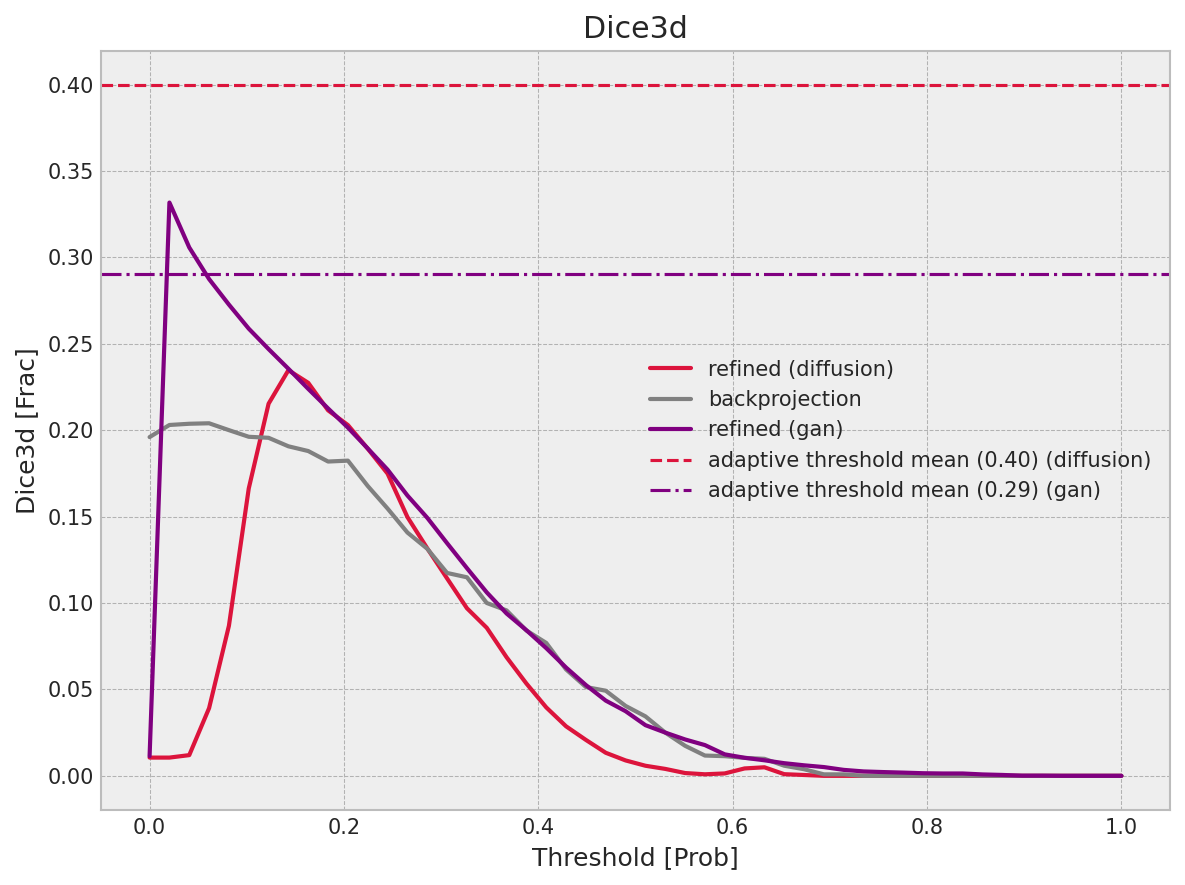

In [46]:
dice3d(df, prefix="refined", legend="refined (diffusion)", color="crimson")
dice3d(df, prefix="backproj", legend="backprojection", color="gray")
dice3d(df_baseline, prefix="refined", legend="refined (gan)", color="purple")
dice3d_adaptive(df_adaptive, color="crimson")
dice3d_adaptive(df_adaptive_baseline, color="purple", line="-.", suffix="(gan)")


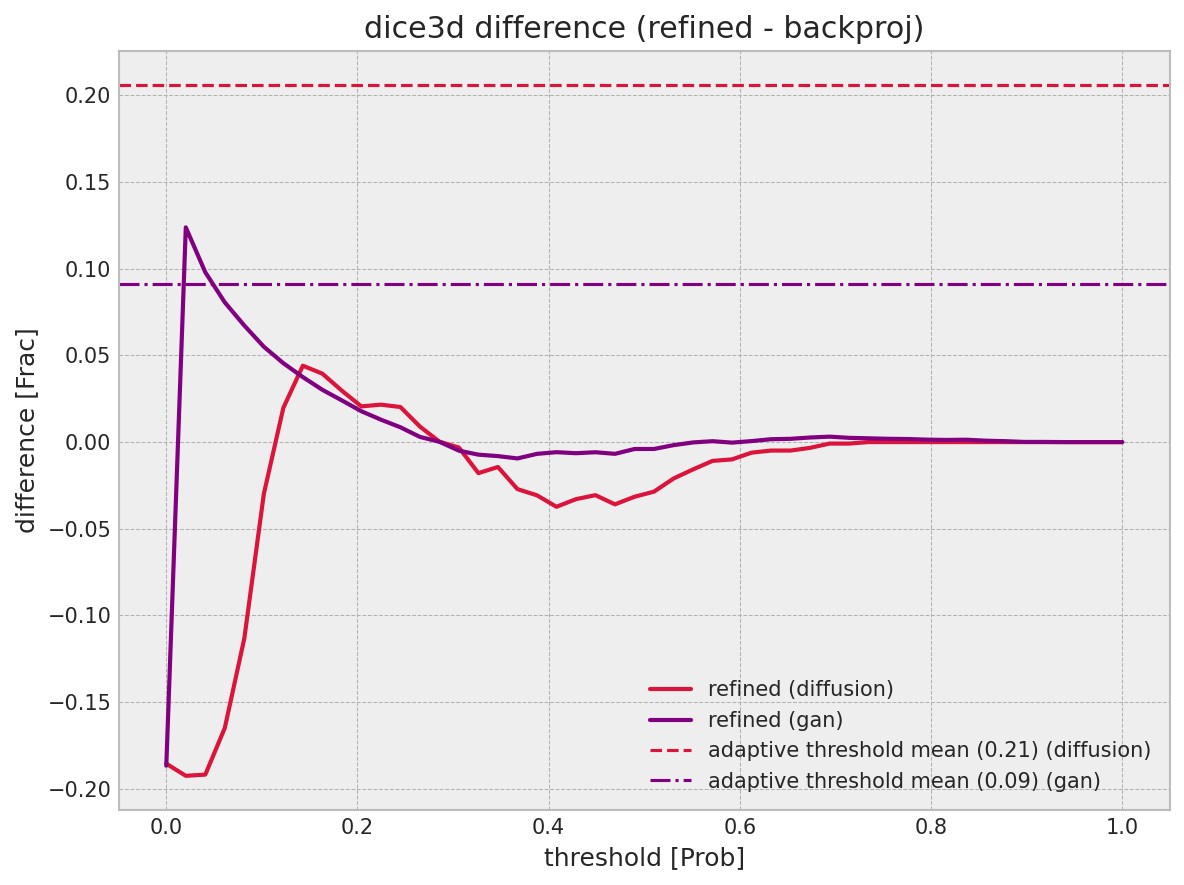

In [89]:
   
plt.title(f"Dice3D refinement (Right arteries)")

metric_difference(df, "dice3d", color="crimson", legend="refined (diffusion)")
metric_difference(df_baseline, "dice3d", color="purple", legend="refined (gan)")
metric_difference_adaptive(df_adaptive, "dice3d", color="crimson")
metric_difference_adaptive(df_adaptive_baseline, "dice3d", color="purple", line="-.", suffix="(gan)")


In [86]:
print(latex_make_table(
    r"$I(\boldsymbol {\hat x},  \boldsymbol x_{\text{interpretable}})$",
    df["interpret_frac"].mean(),
    df_baseline["interpret_frac"].mean(),
    caption="Mean interpretability scores for right arteries",
    label="interpret_frac_right"
))


\begin{table}\begin{center}\begin{tabular}{lc}
\hline
Model & $I(\boldsymbol {\hat x},  \boldsymbol x_{\text{interpretable}})$ \\
\hline
Ours & 0.32 \\
Baseline (gan) & 0.49 \\
\hline
\end{tabular}\end{center}
\caption{Mean interpretability scores for right arteries \label{interpret_frac_right}}
\end{table}



In [88]:
print(latex_make_table(
    r"$PSNR_{\text{test}}$",
    df["PSNR"].str.extract(r"tensor\(([^,]+)", expand=False).astype(float).mean(),
    df_baseline["PSNR"].str.extract(r"tensor\(([^,]+)", expand=False).astype(float).mean(),
    caption="Mean $PSNR$ for right arteries",
    label="psnr_right"
))

\begin{table}\begin{center}\begin{tabular}{lc}
\hline
Model & $PSNR_{\text{test}}$ \\
\hline
Ours & 29.01 \\
Baseline (gan) & 39.68 \\
\hline
\end{tabular}\end{center}
\caption{Mean $PSNR$ for right arteries \label{psnr_right}}
\end{table}

